In [1]:
#stock market prediction (mini project 1)
#importing  Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
aapl = yf.Ticker("AAPL")
#reading the data directly form yahoo finance for APPLE

In [3]:
hist = aapl.history(period="1yr")

In [4]:
aapl.history_metadata

{'currency': 'USD',
 'symbol': 'AAPL',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 345479400,
 'regularMarketTime': 1701291600,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 189.37,
 'chartPreviousClose': 190.4,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'end': 1701354600,
   'start': 1701334800,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'end': 1701378000,
   'start': 1701354600,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'end': 1701392400,
   'start': 1701378000,
   'gmtoffset': -18000}},
 'dataGranularity': '1d',
 'range': '1yr',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

In [5]:
#APPLE
df_aapl = yf.download("aapl",start="2022-11-30",end="2023-11-30")#considering one year data
df_aapl = df.round() #extracting dataframe directily for yahoofinance APPLE

[*********************100%%**********************]  1 of 1 completed


NameError: name 'df' is not defined

In [6]:
df_aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-30,141.399994,148.720001,140.550003,148.029999,147.207169,111380900
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485626,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988403,65447400
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.115646,64727200
...,...,...,...,...,...,...
2023-11-22,191.490005,192.929993,190.830002,191.309998,191.309998,39617700
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600


In [7]:
#perform cleaning
df_aapl.info()#since there is no null and duplicate the apple dataframe is clean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-30 to 2023-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [8]:
df_aapl.isna().sum()#no null in dataframe

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#no duplicate present

<function matplotlib.pyplot.show(close=None, block=None)>

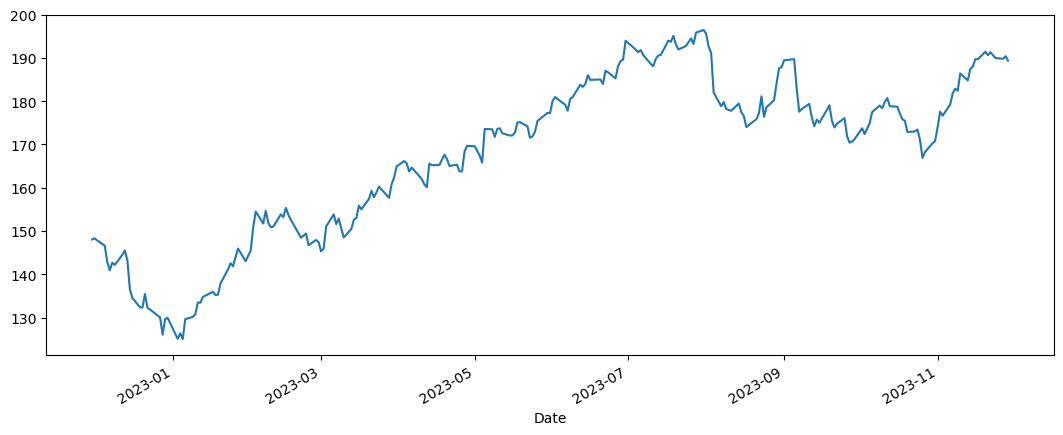

In [12]:
#the change in stock price over time
df_aapl['Close'].plot(figsize=(13,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

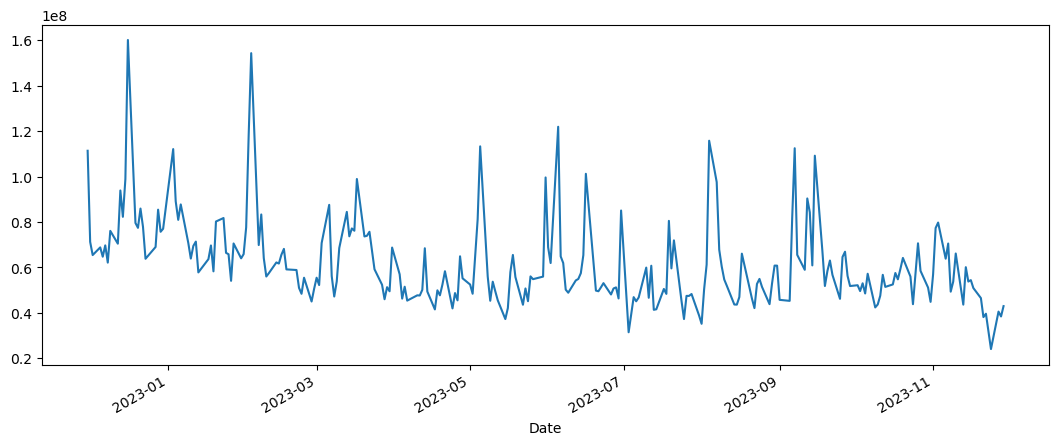

In [14]:
#the change in a stock’s volume being traded, over time
df_aapl['Volume'].plot(figsize=(13,5))
plt.show

In [19]:
#the moving average of various stocks(type1)
aapl_movavg=df_aapl.rolling(window=5).mean()#using df_name.rolling(window_size).mean()
aapl_movavg.head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-05,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-06,146.082004,148.814001,144.100000,146.738000,145.922363,76326460.0
2022-12-07,146.240005,147.744000,143.989999,145.320001,144.512250,67994500.0
2022-12-08,145.070004,146.622000,142.888000,144.188000,143.386542,66170080.0
2022-12-09,144.346002,146.136002,141.938000,143.058002,142.262827,68300000.0
2022-12-12,143.332001,144.852002,140.995999,142.630002,141.837204,68627260.0


In [23]:
#the moving average of various stocks(type2)
window_size=[2,5,10]
for ws in window_size:
    col_name=f"movingavg for{ws}days"
    df_aapl[col_name]=df_aapl['Close'].rolling(window=ws,center=False).mean()

In [24]:
df_aapl.head(30)

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days
Date,,,,,,,,,
2022-11-30,141.399994,148.720001,140.550003,148.029999,147.207169,111380900,NaN,NaN,NaN
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485626,71250400,148.169998,NaN,NaN
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988403,65447400,148.059998,NaN,NaN
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400,147.220001,NaN,NaN
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.115646,64727200,144.770004,146.738000,NaN
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.156601,69721100,141.925003,145.320001,NaN
2022-12-08,142.360001,143.520004,141.100006,142.649994,141.857086,62128300,141.794998,144.188000,NaN
2022-12-09,142.339996,145.570007,140.899994,142.160004,141.369827,76097000,142.404999,143.058002,NaN
2022-12-12,142.699997,144.500000,141.059998,144.490005,143.686859,70462700,143.325005,142.630002,NaN


In [26]:
#the daily return average of a stock
df_aapl['Daily Returns']=df_aapl['Close'].pct_change()

In [27]:
df_aapl.head(30)

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days,Daily Returns
Date,,,,,,,,,,
2022-11-30,141.399994,148.720001,140.550003,148.029999,147.207169,111380900,NaN,NaN,NaN,NaN
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485626,71250400,148.169998,NaN,NaN,0.001892
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988403,65447400,148.059998,NaN,NaN,-0.003371
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400,147.220001,NaN,NaN,-0.007983
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.115646,64727200,144.770004,146.738000,NaN,-0.025370
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.156601,69721100,141.925003,145.320001,NaN,-0.013785
2022-12-08,142.360001,143.520004,141.100006,142.649994,141.857086,62128300,141.794998,144.188000,NaN,0.012133
2022-12-09,142.339996,145.570007,140.899994,142.160004,141.369827,76097000,142.404999,143.058002,NaN,-0.003435
2022-12-12,142.699997,144.500000,141.059998,144.490005,143.686859,70462700,143.325005,142.630002,NaN,0.016390


In [40]:
#a new column ‘Trend’ whose values are based on the 'Daily Return'.
def f(row):
    if row['Daily Returns'] > 0:
        val = 'positve returns'
    elif row['Daily Returns'] < 0:
        val = 'negitive returns'
    else:
        val = 'no returns'
    return val
df_aapl['Trend'] = df_aapl.apply(f,axis=1)
df_aapl
          

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days,Daily Returns,Trend
Date,,,,,,,,,,,
2022-11-30,141.399994,148.720001,140.550003,148.029999,147.207169,111380900,NaN,NaN,NaN,NaN,no returns
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485626,71250400,148.169998,NaN,NaN,0.001892,positve returns
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988403,65447400,148.059998,NaN,NaN,-0.003371,negitive returns
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400,147.220001,NaN,NaN,-0.007983,negitive returns
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.115646,64727200,144.770004,146.738000,NaN,-0.025370,negitive returns
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,191.490005,192.929993,190.830002,191.309998,191.309998,39617700,190.974998,190.560001,188.186000,0.003514,positve returns
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300,190.639999,190.612000,188.942000,-0.007004,negitive returns
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600,189.879997,190.631998,189.281000,-0.000948,negitive returns


<Axes: ylabel='Close'>

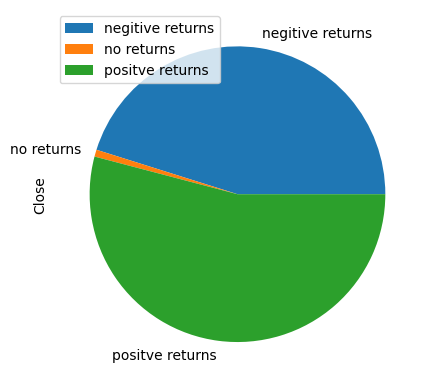

In [59]:
#trend frequency through a Pie Chart

df_aapl.groupby(['Trend']).sum().plot(kind='pie', y='Close')

<Axes: ylabel='Close'>

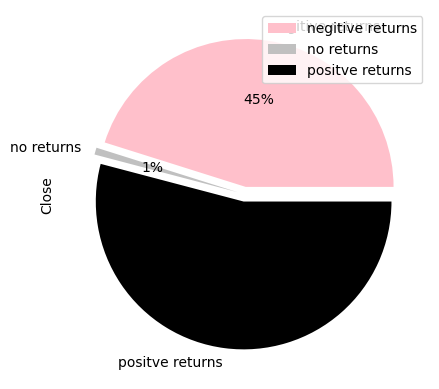

In [60]:
 
colors = ['pink', 'silver', 'black'] 
  
# Define the ratio of gap of each fragment in a tuple 
explode = (0.05, 0.05, 0.05) 
  
# Plotting the pie chart for above dataframe 
df_aapl.groupby(['Trend']).sum().plot( 
    kind='pie', y='Close', autopct='%1.0f%%', 
  colors=colors, explode=explode) 

In [61]:
#GOOGLE
goog = yf.Ticker("GOOG")
#reading the data directly form yahoo finance for APPLE
hist = goog.history(period="1yr")
goog.history_metadata

{'currency': 'USD',
 'symbol': 'GOOG',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 1092922200,
 'regularMarketTime': 1701366322,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 133.32,
 'chartPreviousClose': 136.4,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1701334800,
   'end': 1701354600,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1701354600,
   'end': 1701378000,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1701378000,
   'end': 1701392400,
   'gmtoffset': -18000}},
 'dataGranularity': '1d',
 'range': '1yr',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

In [62]:
#google
df_goog = yf.download("goog",start="2022-11-30",end="2023-11-30")#considering one year data
df_goog = df.round() #extracting dataframe directily for yahoofinance GOOGLE

[*********************100%%**********************]  1 of 1 completed


NameError: name 'df' is not defined

In [63]:
df_goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-30,95.120003,101.449997,94.669998,101.449997,101.449997,39888100
2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500
2022-12-02,99.370003,101.150002,99.169998,100.830002,100.830002,18821500
2022-12-05,99.815002,101.750000,99.355003,99.870003,99.870003,19955500
2022-12-06,99.669998,100.209999,96.760002,97.309998,97.309998,20877600
...,...,...,...,...,...,...
2023-11-22,139.100006,141.100006,139.000000,140.020004,140.020004,17306400
2023-11-24,139.539993,139.677002,137.470001,138.220001,138.220001,8828600
2023-11-27,137.570007,139.630005,137.539993,138.050003,138.050003,17886400


In [64]:
#perform cleaning
df_goog.info()#since there is no null and duplicate the apple dataframe is clean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-30 to 2023-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [65]:
df_goog.isna().sum()#no null in dataframe

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

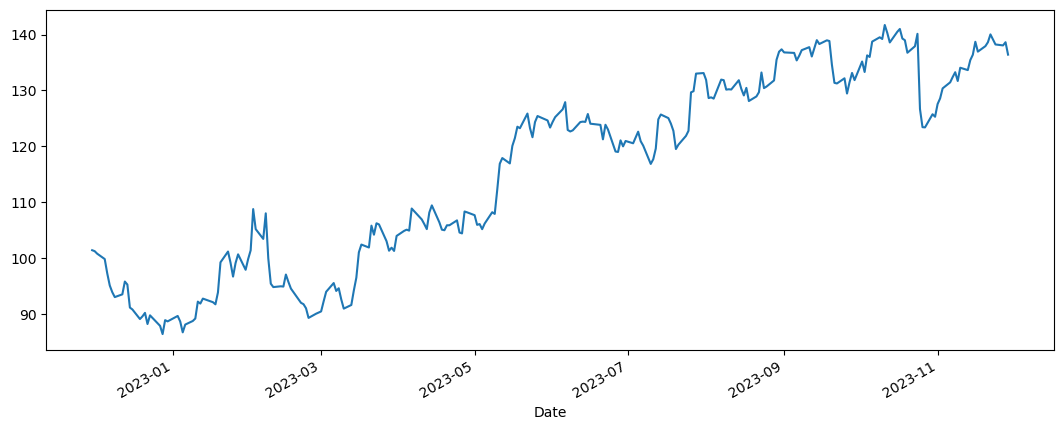

In [66]:
#the change in stock price over time
df_goog['Close'].plot(figsize=(13,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

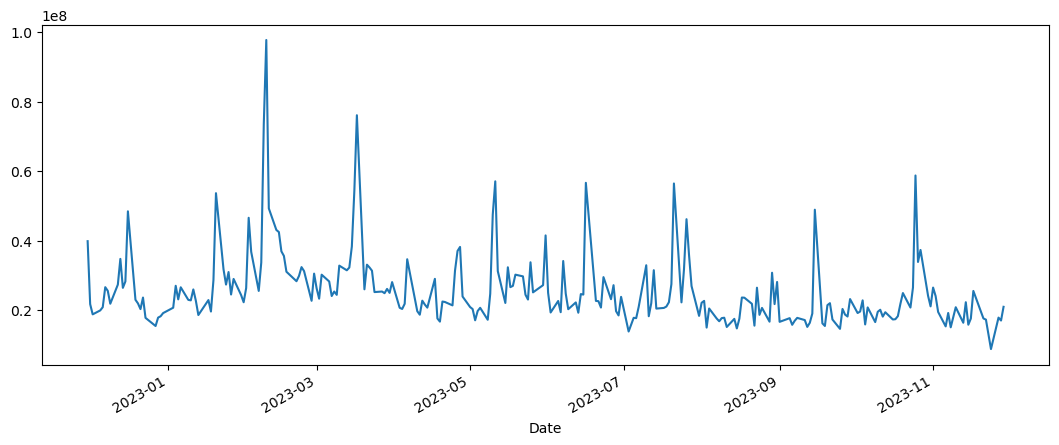

In [67]:
#the change in a stock’s volume being traded, over time
df_goog['Volume'].plot(figsize=(13,5))
plt.show

In [71]:
#the moving average of various stocks
window_size=[2,5,10]
for ws in window_size:
    col_name=f"movingavg for{ws}days"
    df_goog[col_name]=df_goog['Close'].rolling(window=ws,center=False).mean()

In [72]:
df_goog.head(30)

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days
Date,,,,,,,,,
2022-11-30,95.120003,101.449997,94.669998,101.449997,101.449997,39888100,NaN,NaN,NaN
2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500,101.364998,NaN,NaN
2022-12-02,99.370003,101.150002,99.169998,100.830002,100.830002,18821500,101.055000,NaN,NaN
2022-12-05,99.815002,101.750000,99.355003,99.870003,99.870003,19955500,100.350002,NaN,NaN
2022-12-06,99.669998,100.209999,96.760002,97.309998,97.309998,20877600,98.590000,100.148000,NaN
2022-12-07,96.769997,97.309998,95.025002,95.150002,95.150002,26647900,96.230000,98.888000,NaN
2022-12-08,95.690002,95.870003,93.800003,93.949997,93.949997,25593200,94.549999,97.422000,NaN
2022-12-09,93.900002,94.489998,93.019997,93.070000,93.070000,21885300,93.509998,95.870000,NaN
2022-12-12,93.089996,93.875000,91.900002,93.559998,93.559998,27380900,93.314999,94.607999,NaN


In [73]:
#the daily return average of a stock
df_goog['Daily Returns']=df_goog['Close'].pct_change()

In [74]:
df_goog.head(30)

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days,Daily Returns
Date,,,,,,,,,,
2022-11-30,95.120003,101.449997,94.669998,101.449997,101.449997,39888100,NaN,NaN,NaN,NaN
2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500,101.364998,NaN,NaN,-0.001676
2022-12-02,99.370003,101.150002,99.169998,100.830002,100.830002,18821500,101.055000,NaN,NaN,-0.004443
2022-12-05,99.815002,101.750000,99.355003,99.870003,99.870003,19955500,100.350002,NaN,NaN,-0.009521
2022-12-06,99.669998,100.209999,96.760002,97.309998,97.309998,20877600,98.590000,100.148000,NaN,-0.025633
2022-12-07,96.769997,97.309998,95.025002,95.150002,95.150002,26647900,96.230000,98.888000,NaN,-0.022197
2022-12-08,95.690002,95.870003,93.800003,93.949997,93.949997,25593200,94.549999,97.422000,NaN,-0.012612
2022-12-09,93.900002,94.489998,93.019997,93.070000,93.070000,21885300,93.509998,95.870000,NaN,-0.009367
2022-12-12,93.089996,93.875000,91.900002,93.559998,93.559998,27380900,93.314999,94.607999,NaN,0.005265


In [75]:
#a new column ‘Trend’ whose values are based on the 'Daily Return'.
def f(row):
    if row['Daily Returns'] > 0:
        val = 'positve returns'
    elif row['Daily Returns'] < 0:
        val = 'negitive returns'
    else:
        val = 'no returns'
    return val
df_goog['Trend'] = df_goog.apply(f,axis=1)
df_goog

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days,Daily Returns,Trend
Date,,,,,,,,,,,
2022-11-30,95.120003,101.449997,94.669998,101.449997,101.449997,39888100,NaN,NaN,NaN,NaN,no returns
2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500,101.364998,NaN,NaN,-0.001676,negitive returns
2022-12-02,99.370003,101.150002,99.169998,100.830002,100.830002,18821500,101.055000,NaN,NaN,-0.004443,negitive returns
2022-12-05,99.815002,101.750000,99.355003,99.870003,99.870003,19955500,100.350002,NaN,NaN,-0.009521,negitive returns
2022-12-06,99.669998,100.209999,96.760002,97.309998,97.309998,20877600,98.590000,100.148000,NaN,-0.025633,negitive returns
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,139.100006,141.100006,139.000000,140.020004,140.020004,17306400,139.320000,138.439999,136.339999,0.010100,positve returns
2023-11-24,139.539993,139.677002,137.470001,138.220001,138.220001,8828600,139.120003,138.344000,136.992999,-0.012855,negitive returns
2023-11-27,137.570007,139.630005,137.539993,138.050003,138.050003,17886400,138.135002,138.566000,137.392000,-0.001230,negitive returns


<Axes: ylabel='Close'>

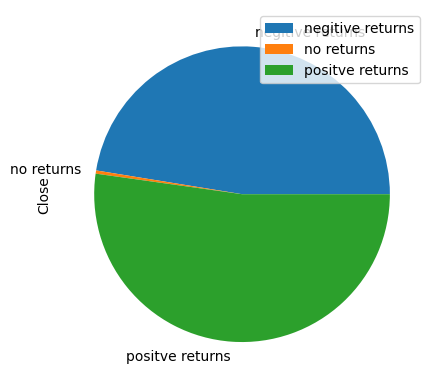

In [76]:
#trend frequency through a Pie Chart

df_goog.groupby(['Trend']).sum().plot(kind='pie', y='Close')

In [77]:
#MICROSOFT
msft = yf.Ticker("MSFT")
#reading the data directly form yahoo finance for MICROSOFT
hist = msft.history(period="1yr")
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1701367398,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 376.93,
 'chartPreviousClose': 378.85,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1701334800,
   'end': 1701354600,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1701354600,
   'end': 1701378000,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1701378000,
   'end': 1701392400,
   'gmtoffset': -18000}},
 'dataGranularity': '1d',
 'range': '1yr',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

In [80]:
#microsoft
df_msft = yf.download("msft",start="2022-11-30",end="2023-11-30")#considering one year data
df_msft = df.round() #extracting dataframe directily for yahoofinance MICROSOFT


[*********************100%%**********************]  1 of 1 completed


NameError: name 'df' is not defined

In [81]:
df_msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-30,240.570007,255.330002,239.860001,255.139999,252.897583,47594200
2022-12-01,253.869995,256.119995,250.919998,254.690002,252.451538,26041500
2022-12-02,249.820007,256.059998,249.690002,255.020004,252.778641,21528500
2022-12-05,252.009995,253.820007,248.059998,250.199997,248.001007,23435300
2022-12-06,250.820007,251.860001,243.779999,245.119995,242.965637,22463700
...,...,...,...,...,...,...
2023-11-22,378.000000,379.790009,374.970001,377.850006,377.850006,23345300
2023-11-24,377.329987,377.970001,375.140015,377.429993,377.429993,10176600
2023-11-27,376.779999,380.640015,376.200012,378.609985,378.609985,22179200


In [82]:
#perform cleaning
df_msft.info()#since there is no null and duplicate the apple dataframe is clean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-30 to 2023-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<function matplotlib.pyplot.show(close=None, block=None)>

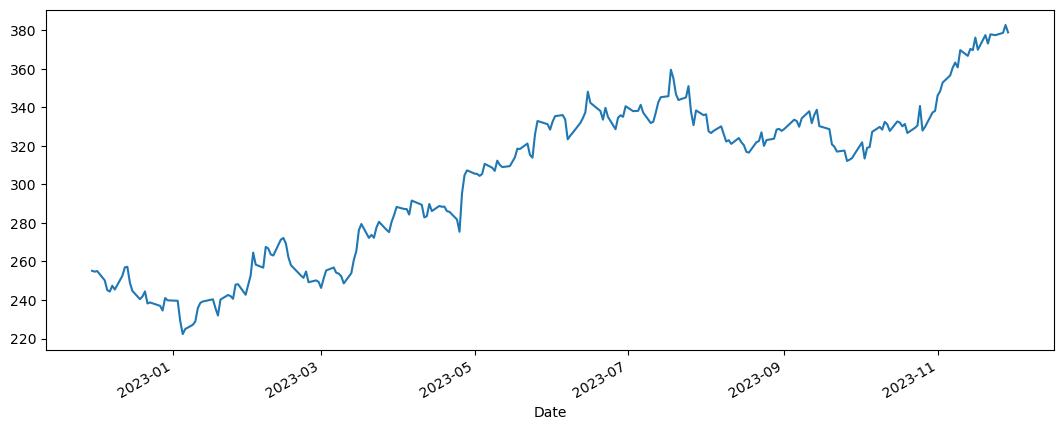

In [83]:
#the change in stock price over time
df_msft['Close'].plot(figsize=(13,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

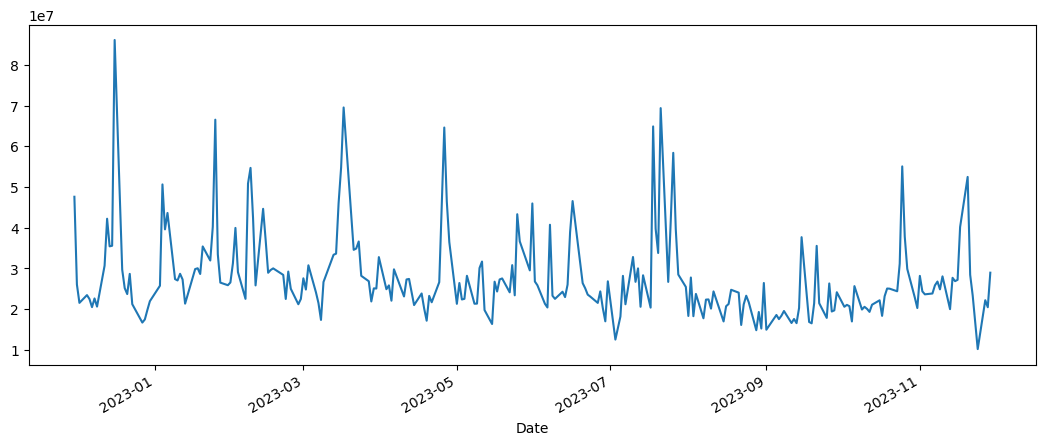

In [84]:
#the change in a stock’s volume being traded, over time
df_msft['Volume'].plot(figsize=(13,5))
plt.show

In [85]:
#the moving average of various stocks
window_size=[2,5,10]
for ws in window_size:
    col_name=f"movingavg for{ws}days"
    df_msft[col_name]=df_msft['Close'].rolling(window=ws,center=False).mean()

In [86]:
df_msft.head(20)

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days
Date,,,,,,,,,
2022-11-30,240.570007,255.330002,239.860001,255.139999,252.897583,47594200,NaN,NaN,NaN
2022-12-01,253.869995,256.119995,250.919998,254.690002,252.451538,26041500,254.915001,NaN,NaN
2022-12-02,249.820007,256.059998,249.690002,255.020004,252.778641,21528500,254.855003,NaN,NaN
2022-12-05,252.009995,253.820007,248.059998,250.199997,248.001007,23435300,252.610001,NaN,NaN
2022-12-06,250.820007,251.860001,243.779999,245.119995,242.965637,22463700,247.659996,252.034000,NaN
2022-12-07,244.830002,246.160004,242.210007,244.369995,242.222229,20481500,244.744995,249.879999,NaN
2022-12-08,244.839996,248.740005,243.059998,247.399994,245.225616,22611800,245.884995,248.421997,NaN
2022-12-09,244.699997,248.309998,244.160004,245.419998,243.263016,20609700,246.409996,246.501996,NaN
2022-12-12,247.449997,252.539993,247.169998,252.509995,250.290680,30665100,248.964996,246.963995,NaN


In [88]:
#the daily return average of a stock
df_msft['Daily Returns']=df_msft['Close'].pct_change()
df_msft.head(20)

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days,Daily Returns
Date,,,,,,,,,,
2022-11-30,240.570007,255.330002,239.860001,255.139999,252.897583,47594200,NaN,NaN,NaN,NaN
2022-12-01,253.869995,256.119995,250.919998,254.690002,252.451538,26041500,254.915001,NaN,NaN,-0.001764
2022-12-02,249.820007,256.059998,249.690002,255.020004,252.778641,21528500,254.855003,NaN,NaN,0.001296
2022-12-05,252.009995,253.820007,248.059998,250.199997,248.001007,23435300,252.610001,NaN,NaN,-0.018901
2022-12-06,250.820007,251.860001,243.779999,245.119995,242.965637,22463700,247.659996,252.034000,NaN,-0.020304
2022-12-07,244.830002,246.160004,242.210007,244.369995,242.222229,20481500,244.744995,249.879999,NaN,-0.003060
2022-12-08,244.839996,248.740005,243.059998,247.399994,245.225616,22611800,245.884995,248.421997,NaN,0.012399
2022-12-09,244.699997,248.309998,244.160004,245.419998,243.263016,20609700,246.409996,246.501996,NaN,-0.008003
2022-12-12,247.449997,252.539993,247.169998,252.509995,250.290680,30665100,248.964996,246.963995,NaN,0.028889


In [102]:
#a new column ‘Trend’ whose values are based on the 'Daily Return'.
def f(row):
    if row['Daily Returns'] > 0:
        val = 'positve returns'
    elif row['Daily Returns'] < 0:
        val = 'negitive returns'
    else:
        val = 'no returns'
    return val
df_msft['Trend'] = df_msft.apply(f,axis=1)
df_msft

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days,Daily Returns,Trend
Date,,,,,,,,,,,
2022-11-30,240.570007,255.330002,239.860001,255.139999,252.897583,47594200,NaN,NaN,NaN,NaN,no returns
2022-12-01,253.869995,256.119995,250.919998,254.690002,252.451538,26041500,254.915001,NaN,NaN,-0.001764,negitive returns
2022-12-02,249.820007,256.059998,249.690002,255.020004,252.778641,21528500,254.855003,NaN,NaN,0.001296,positve returns
2022-12-05,252.009995,253.820007,248.059998,250.199997,248.001007,23435300,252.610001,NaN,NaN,-0.018901,negitive returns
2022-12-06,250.820007,251.860001,243.779999,245.119995,242.965637,22463700,247.659996,252.034000,NaN,-0.020304,negitive returns
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,378.000000,379.790009,374.970001,377.850006,377.850006,23345300,375.460007,374.876007,371.136005,0.012813,positve returns
2023-11-24,377.329987,377.970001,375.140015,377.429993,377.429993,10176600,377.639999,375.128003,372.810004,-0.001112,negitive returns
2023-11-27,376.779999,380.640015,376.200012,378.609985,378.609985,22179200,378.019989,376.879999,373.704001,0.003126,positve returns


<Axes: ylabel='Close'>

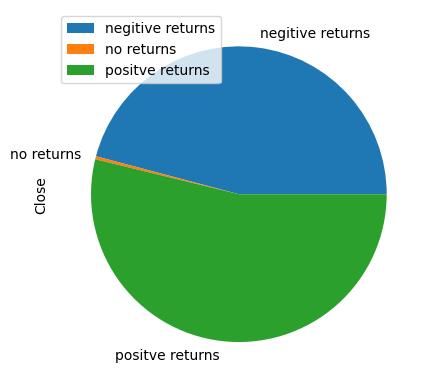

In [103]:
#trend frequency through a Pie Chart

df_msft.groupby(['Trend']).sum().plot(kind='pie', y='Close')

In [91]:
#amazon
amzn = yf.Ticker("AMZN")
#reading the data directly form yahoo finance for AMAZON
hist = amzn.history(period="1yr")
amzn.history_metadata

{'currency': 'USD',
 'symbol': 'AMZN',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 863703000,
 'regularMarketTime': 1701368294,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 144.99,
 'chartPreviousClose': 146.32,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'end': 1701354600,
   'start': 1701334800,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'end': 1701378000,
   'start': 1701354600,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'end': 1701392400,
   'start': 1701378000,
   'gmtoffset': -18000}},
 'dataGranularity': '1d',
 'range': '1yr',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

In [94]:
#amazon
df_amzn = yf.download("amzn",start="2022-11-30",end="2023-11-30")#considering one year data
df_amzn = df.round() #extracting dataframe directily for yahoofinance AMAZON


[*********************100%%**********************]  1 of 1 completed


NameError: name 'df' is not defined

In [95]:
df_amzn.head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-30,92.470001,96.540001,91.529999,96.540001,96.540001,102805800
2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000
2022-12-02,94.480003,95.360001,93.779999,94.129997,94.129997,72496400
2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500
2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600
2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67398500
2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800


In [96]:
#perform cleaning
df_amzn.info()#since there is no null and duplicate the apple dataframe is clean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-30 to 2023-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<function matplotlib.pyplot.show(close=None, block=None)>

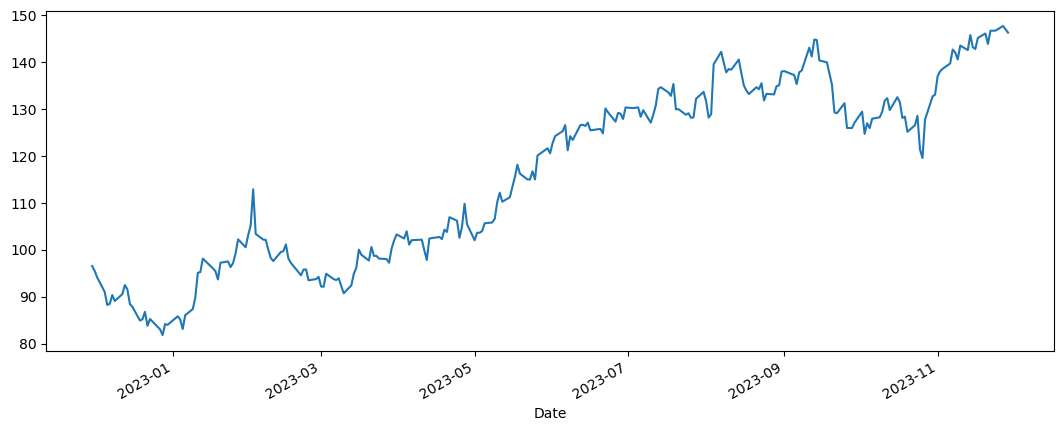

In [97]:
#the change in stock price over time
df_amzn['Close'].plot(figsize=(13,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

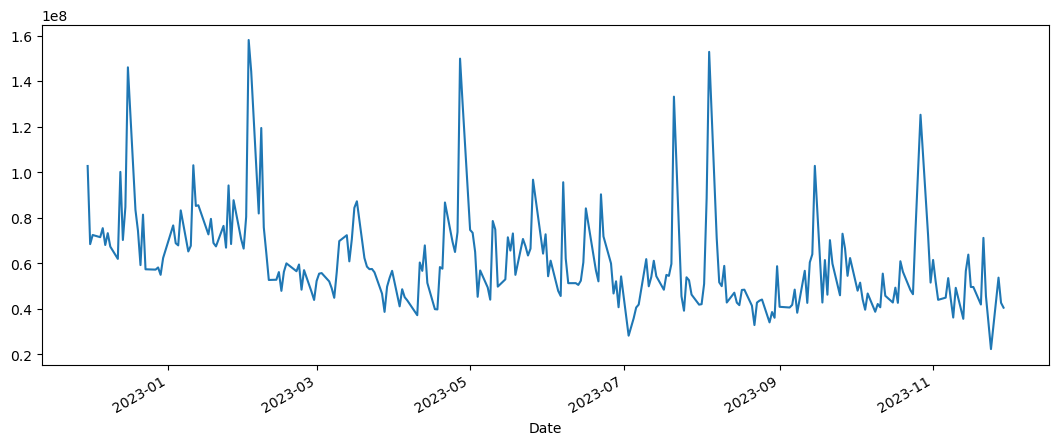

In [98]:
#the change in a stock’s volume being traded, over time
df_amzn['Volume'].plot(figsize=(13,5))
plt.show

In [99]:
#the moving average of various stocks
window_size=[2,5,10]
for ws in window_size:
    col_name=f"movingavg for{ws}days"
    df_amzn[col_name]=df_amzn['Close'].rolling(window=ws,center=False).mean()

In [100]:
df_amzn

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days
Date,,,,,,,,,
2022-11-30,92.470001,96.540001,91.529999,96.540001,96.540001,102805800,NaN,NaN,NaN
2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000,96.020000,NaN,NaN
2022-12-02,94.480003,95.360001,93.779999,94.129997,94.129997,72496400,94.814999,NaN,NaN
2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500,92.570000,NaN,NaN
2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600,89.630001,93.086000,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100,145.305000,144.950000,144.050
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,146.725006,145.732001,144.664
2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400,147.235001,146.242001,145.081


In [101]:
#the daily return average of a stock
df_amzn['Daily Returns']=df_amzn['Close'].pct_change()
df_amzn.head(20)

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days,Daily Returns
Date,,,,,,,,,,
2022-11-30,92.470001,96.540001,91.529999,96.540001,96.540001,102805800,NaN,NaN,NaN,NaN
2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000,96.020000,NaN,NaN,-0.010773
2022-12-02,94.480003,95.360001,93.779999,94.129997,94.129997,72496400,94.814999,NaN,NaN,-0.014346
2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500,92.570000,NaN,NaN,-0.033146
2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600,89.630001,93.086000,NaN,-0.030326
2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900,88.355000,91.470000,NaN,0.002380
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900,89.404999,90.439999,NaN,0.021366
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67398500,89.719997,89.431999,NaN,-0.013946
2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800,89.820000,89.339999,NaN,0.016388


In [104]:
#a new column ‘Trend’ whose values are based on the 'Daily Return'.
def f(row):
    if row['Daily Returns'] > 0:
        val = 'positve returns'
    elif row['Daily Returns'] < 0:
        val = 'negitive returns'
    else:
        val = 'no returns'
    return val
df_amzn['Trend'] = df_amzn.apply(f,axis=1)
df_amzn

,Open,High,Low,Close,Adj Close,Volume,movingavg for2days,movingavg for5days,movingavg for10days,Daily Returns,Trend
Date,,,,,,,,,,,
2022-11-30,92.470001,96.540001,91.529999,96.540001,96.540001,102805800,NaN,NaN,NaN,NaN,no returns
2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000,96.020000,NaN,NaN,-0.010773,negitive returns
2022-12-02,94.480003,95.360001,93.779999,94.129997,94.129997,72496400,94.814999,NaN,NaN,-0.014346,negitive returns
2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500,92.570000,NaN,NaN,-0.033146,negitive returns
2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600,89.630001,93.086000,NaN,-0.030326,negitive returns
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100,145.305000,144.950000,144.050,0.019528,positve returns
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,146.725006,145.732001,144.664,0.000204,positve returns
2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400,147.235001,146.242001,145.081,0.006747,positve returns


<Axes: ylabel='Close'>

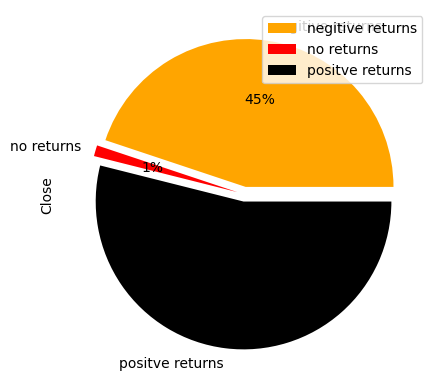

In [105]:
#pie chart
colors = ['orange', 'red', 'black'] 
  
explode = (0.05, 0.05, 0.05) 
  
 
df_amzn.groupby(['Trend']).sum().plot( 
    kind='pie', y='Close', autopct='%1.0f%%', 
  colors=colors, explode=explode) 

In [4]:
# the correlation between the daily returns of different stocks
import pandas_datareader.data as reader#to install pip install pandas_datareader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd

In [11]:
start_date = '2022-11-30'
end_date = '2023-11-30'
tickers_list = ['AAPL','GOOG','MSFT','AMZN']
data = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    data[ticker] = yf.download(ticker,start_date,end_date)['Adj Close']
data  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-11-30,147.207169,101.449997,252.897568,96.540001
2022-12-01,147.485626,101.279999,252.451538,95.500000
2022-12-02,146.988403,100.830002,252.778641,94.129997
2022-12-05,145.814972,99.870003,248.001007,91.010002
2022-12-06,142.115646,97.309998,242.965637,88.250000
...,...,...,...,...
2023-11-22,191.309998,140.020004,377.850006,146.710007
2023-11-24,189.970001,138.220001,377.429993,146.740005
2023-11-27,189.789993,138.050003,378.609985,147.729996


In [12]:
dailyreturns = data.pct_change()#getting the daily returns of diffrent stocks(aapl,msft,goog and amzn)

In [14]:
dailyreturns

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-11-30,NaN,NaN,NaN,NaN
2022-12-01,0.001892,-0.001676,-0.001764,-0.010773
2022-12-02,-0.003371,-0.004443,0.001296,-0.014346
2022-12-05,-0.007983,-0.009521,-0.018900,-0.033146
2022-12-06,-0.025370,-0.025633,-0.020304,-0.030326
...,...,...,...,...
2023-11-22,0.003514,0.010100,0.012813,0.019528
2023-11-24,-0.007004,-0.012855,-0.001112,0.000204
2023-11-27,-0.000948,-0.001230,0.003126,0.006747


In [15]:
dailyreturns.corr()#getting the correlation of diffrent stocks(aapl,msft,goog and amzn)


,AAPL,GOOG,MSFT,AMZN
AAPL,1.000000,0.565271,0.582306,0.467718
GOOG,0.565271,1.000000,0.548224,0.632776
MSFT,0.582306,0.548224,1.000000,0.600345
AMZN,0.467718,0.632776,0.600345,1.000000


<Axes: >

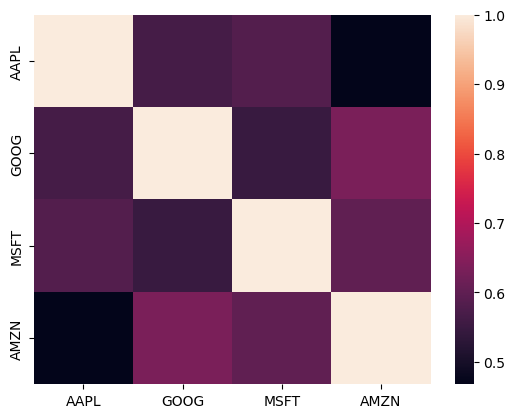

In [16]:
#Visualize the correlation of diffrent stocks through heat map
sns.heatmap(dailyreturns.corr())